# ***World Happiness Report - EDA***
---

For this Workshop we will explore the Happiness Score and Ranking across the planet and the relationship between the other variables in the datasets. Taking into account this information and the context of the problem we will culminate this notebook with the training of a Machine Learning model.

## **Setting the notebook**

First we will adjust the directory of our project in order to correctly detect the packages and modules that we are going to use.

In [2]:
import os

try:
    os.chdir("../../etl-workshop-3")
except FileNotFoundError:
    print("You are already in the correct directory.")

We proceed to import the following for this notebook:

### **Dependencies**

* **Pandas** ➜ Used for data manipulation and analysis.
* **Country Converter (coco)** ➜ Used for converting country names to various formats, including continent names.
* **Matplotlib** ➜ Used for creating static, animated, and interactive visualizations in Python.
* **Plotly** ➜ Used for creating interactive plots and visualizations.

### **Modules**

* **utils.dataframe_utils** ➜ Custom utility functions for dataframe operations.

In [3]:
# Data Manipulation
import pandas as pd
import country_converter as coco

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Python modules
from utils.dataframe_utils import *

## **Reading the data**

### ***2015***

In [4]:
df_2015 = pd.read_csv("./data/2015.csv")
df_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [5]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### ***2016***

In [6]:
df_2016 = pd.read_csv("./data/2016.csv")
df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [7]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

### ***2017***

In [8]:
df_2017 = pd.read_csv("./data/2017.csv")
df_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [9]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

### ***2018***

In [10]:
df_2018 = pd.read_csv("./data/2018.csv")
df_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [11]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### ***2019***

In [12]:
df_2019 = pd.read_csv("./data/2019.csv")
df_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [13]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## ***Comparing the data***

Upon analyzing the previous dataframes, it can be observed that many of them contain columns that, although they provide similar information, differ in their naming. It is necessary to normalize these names in order to merge these datasets.

To achieve this, we will thoroughly analyze these differences to ultimately obtain the merged dataset.

In [14]:
happiness_dataframes = {
    "2015": df_2015,
    "2016": df_2016,
    "2017": df_2017,
    "2018": df_2018,
    "2019": df_2019
}

In the following section, we observe that both the number of rows and columns differ between years. Additionally, we notice that there is a row in 2018 containing a null value, which we will consider later. For now, we do not have duplicate data in any of the datasets.

In [15]:
briefing = dataframe_briefing(happiness_dataframes)
briefing

,Year,Number of rows,Number of columns,Number of null values,Number of duplicated values
0,2015,158,12,0,0
1,2016,157,13,0,0
2,2017,155,12,0,0
3,2018,156,9,1,0
4,2019,156,9,0,0


To determine these differences in the number and naming of columns, we will need to analyze how they change and are distributed over the years.

In [16]:
comparison_df = comparing_names(happiness_dataframes)
print(comparison_df)

                              2015 2016 2017 2018 2019
Column Name                                           
Health..Life.Expectancy.         ✘    ✘    ✔    ✘    ✘
Freedom                          ✔    ✔    ✔    ✘    ✘
Overall rank                     ✘    ✘    ✘    ✔    ✔
Happiness.Rank                   ✘    ✘    ✔    ✘    ✘
Lower Confidence Interval        ✘    ✔    ✘    ✘    ✘
Region                           ✔    ✔    ✘    ✘    ✘
Upper Confidence Interval        ✘    ✔    ✘    ✘    ✘
Health (Life Expectancy)         ✔    ✔    ✘    ✘    ✘
Score                            ✘    ✘    ✘    ✔    ✔
Happiness Score                  ✔    ✔    ✘    ✘    ✘
Happiness.Score                  ✘    ✘    ✔    ✘    ✘
Standard Error                   ✔    ✘    ✘    ✘    ✘
Economy..GDP.per.Capita.         ✘    ✘    ✔    ✘    ✘
Economy (GDP per Capita)         ✔    ✔    ✘    ✘    ✘
Dystopia Residual                ✔    ✔    ✘    ✘    ✘
Dystopia.Residual                ✘    ✘    ✔    ✘    ✘
Perception

## ***Data preparation***

### **Normalizing the names of the columns**

From the previous table, we will begin to normalize and unify the column names into broader categories. The categories to use now are:

* Happiness Score

* Happiness Rank

* Economy (GDP per Capita)

* Health (Life Expectancy)

* Social Support

* Freedom

* Perceptions of Corruption

* Dystopia Residual

In [17]:
column_mapping = {    
    # Country
    'Country': 'country',
    'Country or region': 'country',
    
    # Happiness Score
    'Happiness Score': 'happiness_score',
    'Happiness.Score': 'happiness_score',
    'Score': 'happiness_score',
    
    # Happiness Rank
    'Happiness Rank': 'happiness_rank',
    'Happiness.Rank': 'happiness_rank',
    'Overall rank': 'happiness_rank',
    
    # Economy (GDP per Capita)
    'Economy (GDP per Capita)': 'economy',
    'Economy..GDP.per.Capita.': 'economy',
    'GDP per capita': 'economy',
    
    # Health (Life Expectancy)
    'Health (Life Expectancy)': 'health',
    'Health..Life.Expectancy.': 'health',
    'Healthy life expectancy': 'health',
    
    # Social Support
    'Family': 'social_support',
    'Social support': 'social_support',
    
    # Freedom
    'Freedom': 'freedom',
    'Freedom to make life choices': 'freedom',
    
    # Perceptions of Corruption
    'Trust (Government Corruption)': 'corruption_perception',
    'Trust..Government.Corruption.': 'corruption_perception',
    'Perceptions of corruption': 'corruption_perception',
    
    # Generosity
    'Generosity': 'generosity',
    
    # Dystopia Residual
    'Dystopia Residual': 'dystopia_residual',
    'Dystopia.Residual': 'dystopia_residual',
}

We iterate through the dictionary to apply the column mapping to all the available dataframes. Upon reviewing the results, we can observe the changes made.

In [18]:
normalized_datasets = {}

for year, df in happiness_dataframes.items():
    df = df.rename(columns=column_mapping)
    normalized_datasets[year] = df

In [19]:
normalized_datasets["2015"].head(3)

,country,Region,happiness_rank,happiness_score,Standard Error,economy,social_support,health,freedom,corruption_perception,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [20]:
normalized_datasets["2018"].head(3)

,happiness_rank,country,happiness_score,economy,social_support,health,freedom,generosity,corruption_perception
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


### **Adding years column**
To concatenate the DataFrames, we need to add a year column that allows us to identify the temporal aspect of the data.

In [21]:
yearly_happiness_dataframes = {}

for year, df in normalized_datasets.items():
    df["year"] = year
    yearly_happiness_dataframes[year] = df

In [22]:
yearly_happiness_dataframes["2015"].head(3)

,country,Region,happiness_rank,happiness_score,Standard Error,economy,social_support,health,freedom,corruption_perception,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


In [23]:
yearly_happiness_dataframes["2019"].head(3)

,happiness_rank,country,happiness_score,economy,social_support,health,freedom,generosity,corruption_perception,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019


### **Concatenating all dataframes, keeping only the columns in common**

We perform the concatenation of the five dataframes contained in `yearly_happiness_dataframes`, retaining only the columns that are present in all of them. 

Let's also review which are those columns. In this case, the columns that we are going to drop are:

* Standard Error

* Lower Confidence Interval

* dystopia_residual

* Region

* Upper Confidence Interval

* Whisker.low

* Whisker.high

In [24]:
comparison_yearly_df = comparing_names(yearly_happiness_dataframes)
print(comparison_yearly_df)

                          2015 2016 2017 2018 2019
Column Name                                       
happiness_rank               ✔    ✔    ✔    ✔    ✔
generosity                   ✔    ✔    ✔    ✔    ✔
country                      ✔    ✔    ✔    ✔    ✔
corruption_perception        ✔    ✔    ✔    ✔    ✔
Standard Error               ✔    ✘    ✘    ✘    ✘
year                         ✔    ✔    ✔    ✔    ✔
Lower Confidence Interval    ✘    ✔    ✘    ✘    ✘
happiness_score              ✔    ✔    ✔    ✔    ✔
Whisker.high                 ✘    ✘    ✔    ✘    ✘
Region                       ✔    ✔    ✘    ✘    ✘
dystopia_residual            ✔    ✔    ✔    ✘    ✘
Upper Confidence Interval    ✘    ✔    ✘    ✘    ✘
health                       ✔    ✔    ✔    ✔    ✔
Whisker.low                  ✘    ✘    ✔    ✘    ✘
freedom                      ✔    ✔    ✔    ✔    ✔
economy                      ✔    ✔    ✔    ✔    ✔
social_support               ✔    ✔    ✔    ✔    ✔


---

In [25]:
common_columns = list(set.intersection(*(set(df.columns) for df in yearly_happiness_dataframes.values())))

filtered_dataframes = [df[common_columns] for df in yearly_happiness_dataframes.values()]

df = pd.concat(filtered_dataframes, ignore_index=True)

df.head()

,generosity,happiness_rank,country,corruption_perception,year,happiness_score,health,freedom,economy,social_support
0,0.29678,1,Switzerland,0.41978,2015,7.587,0.94143,0.66557,1.39651,1.34951
1,0.43630,2,Iceland,0.14145,2015,7.561,0.94784,0.62877,1.30232,1.40223
2,0.34139,3,Denmark,0.48357,2015,7.527,0.87464,0.64938,1.32548,1.36058
3,0.34699,4,Norway,0.36503,2015,7.522,0.88521,0.66973,1.45900,1.33095
4,0.45811,5,Canada,0.32957,2015,7.427,0.90563,0.63297,1.32629,1.32261


### **Review of the final dataframe: filling N/A values**

Our final dataframe contains **782 rows** and **9 columns** that compile the data from all five years. Using the info method to view the dataframe details, we observe that Perceptions of Corruption contains a null value; we will examine this case in depth.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   generosity             782 non-null    float64
 1   happiness_rank         782 non-null    int64  
 2   country                782 non-null    object 
 3   corruption_perception  781 non-null    float64
 4   year                   782 non-null    object 
 5   happiness_score        782 non-null    float64
 6   health                 782 non-null    float64
 7   freedom                782 non-null    float64
 8   economy                782 non-null    float64
 9   social_support         782 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [27]:
df[df['corruption_perception'].isna()]

,generosity,happiness_rank,country,corruption_perception,year,happiness_score,health,freedom,economy,social_support
489,0.186,20,United Arab Emirates,NaN,2018,6.774,0.67,0.284,2.096,0.776


In such cases, the recommended approach is to **replace the null value with the mean** of this field; we will proceed to do so. Before that, we will use the describe method to see the value we will use, which is `0.125436`.

Before moving on to the next step, I'd like you to consider this: check the minimum values in some columns. Doesn't it seem odd that ***there are values of 0***? We need to look into this more closely as well.

In [28]:
df.describe()

,generosity,happiness_rank,corruption_perception,happiness_score,health,freedom,economy,social_support
count,782.000000,782.000000,781.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.218576,78.698210,0.125436,5.379018,0.612416,0.411091,0.916047,1.078392
std,0.122321,45.182384,0.105816,1.127456,0.248309,0.152880,0.407340,0.329548
min,0.000000,1.000000,0.000000,2.693000,0.000000,0.000000,0.000000,0.000000
25%,0.130000,40.000000,0.054000,4.509750,0.440183,0.309768,0.606500,0.869363
50%,0.201982,79.000000,0.091000,5.322000,0.647310,0.431000,0.982205,1.124735
75%,0.278832,118.000000,0.156030,6.189500,0.808000,0.531000,1.236187,1.327250
max,0.838075,158.000000,0.551910,7.769000,1.141000,0.724000,2.096000,1.644000


In [29]:
df["corruption_perception"] = (
                                df["corruption_perception"]
                                .fillna(df["corruption_perception"].mean())
                            )

In [30]:
df.query("country == 'United Arab Emirates' & year == '2018'")

,generosity,happiness_rank,country,corruption_perception,year,happiness_score,health,freedom,economy,social_support
489,0.186,20,United Arab Emirates,0.125436,2018,6.774,0.67,0.284,2.096,0.776


### **Review of the final dataframe: minimum values of 0**

Upon examining some values, we could determine that certain figures make sense within their context (for example, Somalia, whose economy is listed as 0). Therefore, transforming these values would require deeper investigation into the sources from which this data originates.

In [31]:
df[df.eq(0).any(axis=1)].head(10)

,generosity,happiness_rank,country,corruption_perception,year,happiness_score,health,freedom,economy,social_support
73,0.51535,74,Indonesia,0.00000,2015,5.399,0.63793,0.46611,0.82827,1.08708
101,0.00000,102,Greece,0.01397,2015,4.857,0.88213,0.07699,1.15406,0.92933
111,0.17922,112,Iraq,0.13788,2015,4.677,0.60237,0.00000,0.98549,0.81889
119,0.24834,120,Congo (Kinshasa),0.07625,2015,4.517,0.09806,0.22605,0.00000,1.00120
122,0.21488,123,Sierra Leone,0.08786,2015,4.507,0.00000,0.40840,0.33024,0.95571
147,0.23835,148,Central African Republic,0.08289,2015,3.678,0.06699,0.48879,0.07850,0.00000
233,0.27225,76,Somalia,0.31180,2016,5.440,0.11466,0.56778,0.00000,0.33613
244,0.29889,87,Bosnia and Herzegovina,0.00000,2016,5.163,0.70766,0.09511,0.93383,0.64367
256,0.00000,99,Greece,0.04127,2016,5.033,0.80029,0.05822,1.24886,0.75473
268,0.23897,111,Sierra Leone,0.08196,2016,4.635,0.00000,0.30685,0.36485,0.62800


### **Review of the final dataframe: adding continent column**

A column indicating each country's continent will be added using `country_converter` to perform a more detailed geographical analysis.

In [32]:
cc = coco.CountryConverter()

def continent_conversion(country):
    try:
        return cc.convert(names=country, to='continent')
    except:
        return None

In [33]:
df["continent"] = df["country"].apply(continent_conversion)
df[["continent", "country"]].head(10)

,continent,country
0,Europe,Switzerland
1,Europe,Iceland
2,Europe,Denmark
3,Europe,Norway
4,America,Canada
5,Europe,Finland
6,Europe,Netherlands
7,Europe,Sweden
8,Oceania,New Zealand
9,Oceania,Australia


For this case, I would prefer to separate America into North America, Central America and South America. Let's review the unique values and establish the mapping of the continents.

In [34]:
unique_countries = df.drop_duplicates(subset=['country'])
unique_countries['continent'].value_counts()

continent
Africa     50
Asia       50
Europe     41
America    27
Oceania     2
Name: count, dtype: int64

In [35]:
unique_countries.query("continent == 'America'")["country"].unique()

array(['Canada', 'Costa Rica', 'Mexico', 'United States', 'Brazil',
       'Venezuela', 'Panama', 'Chile', 'Argentina', 'Uruguay', 'Colombia',
       'Suriname', 'Trinidad and Tobago', 'El Salvador', 'Guatemala',
       'Ecuador', 'Bolivia', 'Paraguay', 'Nicaragua', 'Peru', 'Jamaica',
       'Dominican Republic', 'Honduras', 'Haiti', 'Puerto Rico', 'Belize',
       'Trinidad & Tobago'], dtype=object)

In [36]:
continent_mapping = {
    "Canada": "North America",
    "Costa Rica": "Central America",
    "Mexico": "North America",
    "United States": "North America",
    "Brazil": "South America",
    "Venezuela": "South America",
    "Panama": "Central America",
    "Chile": "South America",
    "Argentina": "South America",
    "Uruguay": "South America",
    "Colombia": "South America",
    "Suriname": "South America",
    "Trinidad and Tobago": "South America",
    "El Salvador": "Central America",
    "Guatemala": "Central America",
    "Ecuador": "South America",
    "Bolivia": "South America",
    "Paraguay": "South America",
    "Nicaragua": "Central America",
    "Peru": "South America",
    "Jamaica": "Central America",
    "Dominican Republic": "Central America",
    "Honduras": "Central America",
    "Haiti": "Central America",
    "Puerto Rico": "Central America",
    "Belize": "Central America",
    "Trinidad & Tobago": "South America"
}

In [37]:
df["continent"] = df["country"].map(continent_mapping).fillna(df["continent"])
df[["continent", "country"]].head(10)

,continent,country
0,Europe,Switzerland
1,Europe,Iceland
2,Europe,Denmark
3,Europe,Norway
4,North America,Canada
5,Europe,Finland
6,Europe,Netherlands
7,Europe,Sweden
8,Oceania,New Zealand
9,Oceania,Australia


### **Review of the final dataframe: reordering the columns**
To make the dataframe easier to read, we will reorder the columns.

In [38]:
new_order = [
    'country',
    'continent',
    'year',
    'economy',
    'health',
    'social_support',
    'freedom',
    'corruption_perception',
    'generosity',
    'happiness_rank',
    'happiness_score'
]

df = df[new_order]
df.head()

,country,continent,year,economy,health,social_support,freedom,corruption_perception,generosity,happiness_rank,happiness_score
0,Switzerland,Europe,2015,1.39651,0.94143,1.34951,0.66557,0.41978,0.29678,1,7.587
1,Iceland,Europe,2015,1.30232,0.94784,1.40223,0.62877,0.14145,0.43630,2,7.561
2,Denmark,Europe,2015,1.32548,0.87464,1.36058,0.64938,0.48357,0.34139,3,7.527
3,Norway,Europe,2015,1.45900,0.88521,1.33095,0.66973,0.36503,0.34699,4,7.522
4,Canada,North America,2015,1.32629,0.90563,1.32261,0.63297,0.32957,0.45811,5,7.427


## ***Data understanding***

### *Between misery and happiness*
---

### **Average scores**

Using a radar chart, we detail the average values of the indicators that make up the happiness_score and, therefore, determine the happiness ranking.

We found that the average perception of the economy is among the highest indices, with a value of 0.92, indicating that in most countries people perceive their economic situation as at least stable.

Among the lowest indices, we find the perception of corruption, which has an average value of 0.12, suggesting a low level of public trust in governmental entities.

In [39]:
categories = ["economy", "health", "social_support", "freedom", "corruption_perception", "generosity"]
df_scores = df[categories]

average_values = df_scores.mean()

data = pd.DataFrame({
    "Category": categories,
    "Average Score": [average_values[category] for category in categories]
})

fig = px.line_polar(data, r="Average Score", theta="Category", line_close=True)

fig.update_traces(fill="toself")
fig.update_layout(title="Average Scores")

fig.show()

---
<p align="center">
    <img src="https://i.imgur.com/ux8qmMa.png" alt="Average scores">
</p>

### **Happiness Score per Country**

In this section, we will visualize the geographical distribution of happiness scores across different countries. Using a choropleth map, we can observe how happiness scores vary globally. 

For example, we can observe how the African region has the lowest happiness scores worldwide, while the Americas and Europe maintain scores ranging from medium to high.

In [41]:
fig = px.choropleth(df, 
                    locations="country", 
                    locationmode="country names", 
                    color="happiness_score", 
                    hover_name="country", 
                    color_continuous_scale="YlGnBu", 
                    title="Happiness Score per Country")

fig.show()

---
<p align="center">
    <img src="https://i.imgur.com/oFzO3Zt.png" alt="Happiness Score per Country">
</p>

### **Distribution of scores**

This set of graphs shows the distribution of various variables that influence the `happiness_score`. Here are some key conclusions:

* **Economy**: Most countries have values around 1.0, with some reaching up to 2.0. This suggests that in many countries, people perceive their economic situation to be relatively good.

* **Health**: The distribution is centered around 0.7 to 1.0, indicating that most people enjoy good health, although there is significant variation between countries.

* **Social Support**: Most values are concentrated between 1.0 and 1.5, meaning that, in general, people feel they have a good level of social support.

* **Freedom**: Although most values are below 0.6, there is considerable variation. This indicates that perceptions of freedom vary widely across countries.

* **Corruption Perception**: The values are low, mostly below 0.3, indicating that in most countries, there is a negative perception of corruption.

* **Generosity**: Generosity values are mostly around 0.2 to 0.3, suggesting that, on average, people do not perceive a high level of generosity in society.

* **Happiness Score**: Happiness scores are concentrated between 4 and 6, implying that most countries have a medium level of happiness, with fewer cases at the extremes (either low or very high scores).

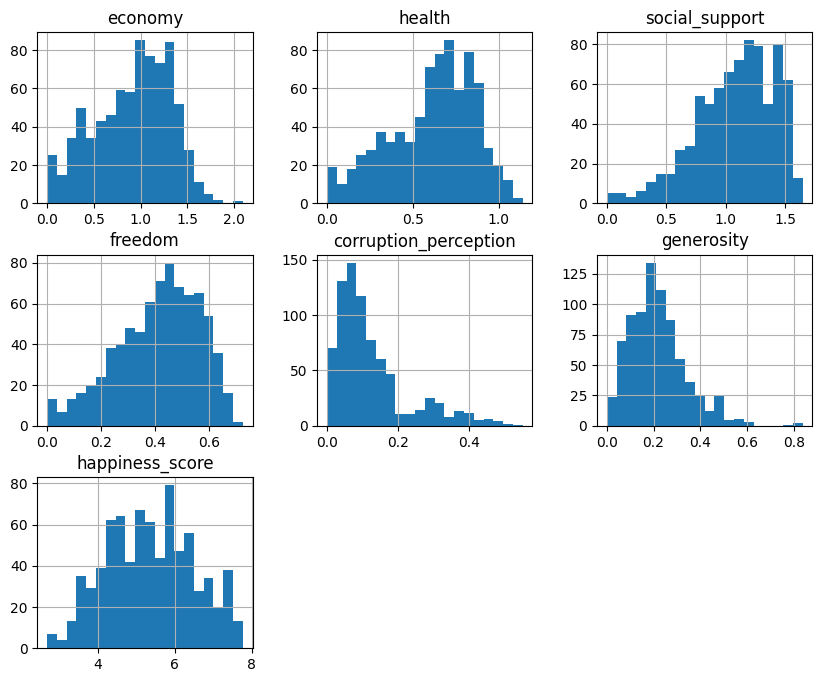

In [47]:
hist_graph = df.drop(columns=["happiness_rank", "year"]).copy()

hist_graph.hist(figsize=(10, 8), bins=20)
plt.show()

### **The happiest countries and continents**

This set of graphs shows the **Top 10 Countries** and **Top 10 Continents** ranked by their average *happiness score*.

**Chart 1: Top 10 Countries by Average Happiness Score**  
- The countries with the highest happiness scores are mostly European nations, with Denmark, Norway, Finland, and Switzerland leading the way, all scoring above 7.
- Canada, New Zealand, and Australia also appear in the ranking, indicating that these non-European nations have similar happiness levels.
- The small variation between scores suggests that these countries have relatively similar levels of happiness.

**Chart 2: Top 10 Continents by Average Happiness Score**  
- **Oceania** leads with the highest average happiness score, followed closely by **North America** and **Europe**.
- **South America** and **Central America** also have relatively high scores, though slightly below the top leaders.
- **Asia** shows a lower average score, and **Africa** has the lowest score, confirming that African countries, on average, report lower levels of happiness compared to other regions of the world.

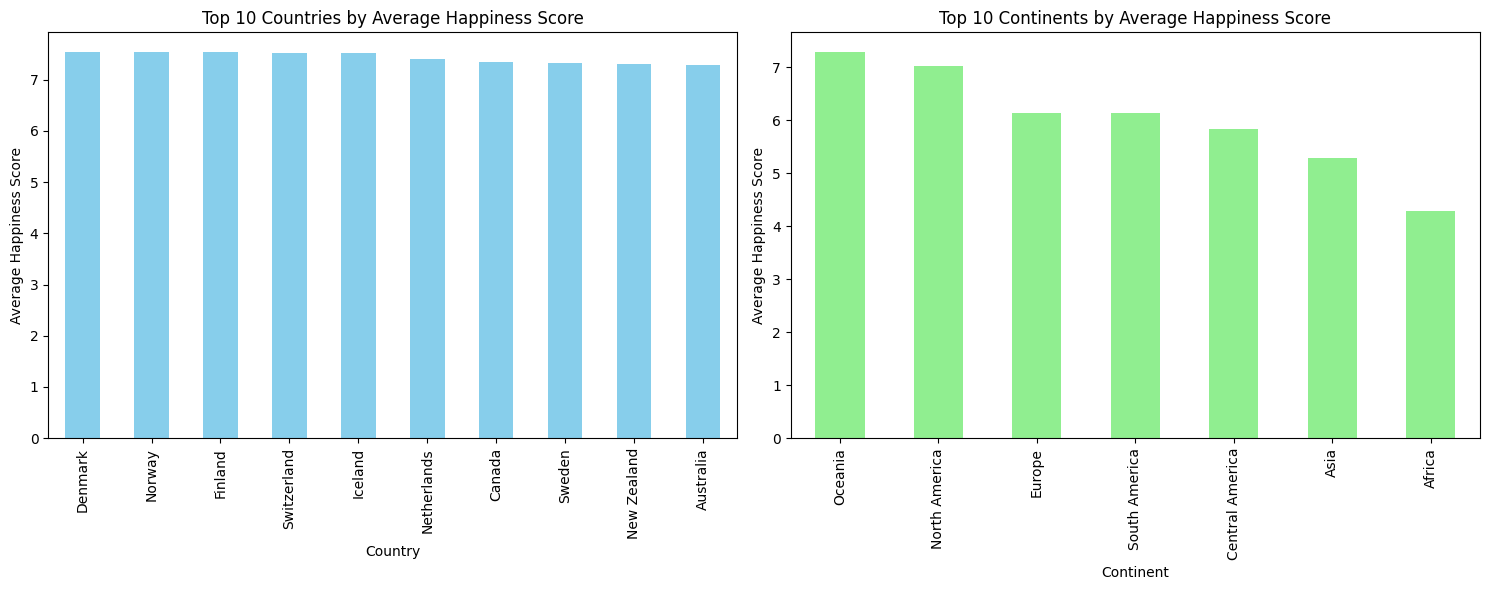

In [48]:
avg_happiness_by_country = df.groupby("country")["happiness_score"].mean().sort_values(ascending=False).head(10)
avg_happiness_by_continent = df.groupby("continent")["happiness_score"].mean().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

avg_happiness_by_country.plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Top 10 Countries by Average Happiness Score")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Average Happiness Score")

avg_happiness_by_continent.plot(kind="bar", ax=axes[1], color="lightgreen")
axes[1].set_title("Top 10 Continents by Average Happiness Score")
axes[1].set_xlabel("Continent")
axes[1].set_ylabel("Average Happiness Score")

plt.tight_layout()
plt.show()

### **Correlation matrix**

The correlation matrix provides valuable insights into the relationships between various features that contribute to the *happiness score* and their impact on happiness rankings. Here are key takeaways relevant for building a future machine learning model:

1. **Economy and Happiness**: There is a strong positive correlation (0.79) between the economy and *happiness score*, indicating that better economic conditions are closely linked to higher happiness levels. This feature is likely to be important for prediction.

2. **Health and Happiness**: Health shows a high positive correlation (0.74) with *happiness score*, suggesting that health status plays a crucial role in determining overall happiness. This will also be a key predictor in the model.

3. **Social Support**: With a significant positive correlation (0.65), social support is another important factor, indicating that countries with better social networks tend to have higher happiness levels. Including this feature should improve model accuracy.

4. **Freedom and Happiness**: Freedom exhibits a moderate positive correlation (0.55), meaning that increased perceived freedom is associated with greater happiness. While important, this feature might have less weight compared to economy and health.

5. **Corruption Perception**: Although not as strong as other features, corruption perception shows a positive correlation (0.40) with happiness, suggesting that lower perceived corruption is linked to higher happiness. This feature may have some predictive power but likely less influence.

6. **Generosity**: Interestingly, generosity has a very low correlation (0.14) with happiness, implying it has a limited impact on predicting happiness scores. This feature might be less relevant for the model.

7. **Happiness Rank and *Happiness Score***: As expected, there's a strong negative correlation (-0.99) between happiness rank and *happiness score*, reflecting the inverse relationship—higher happiness scores correspond to better ranks.

Given these insights, a future model could prioritize the strongest predictors—economy, health, and social support—while deprioritizing variables like generosity. The model could focus on predicting *happiness score* based on these key features, improving its overall predictive performance.

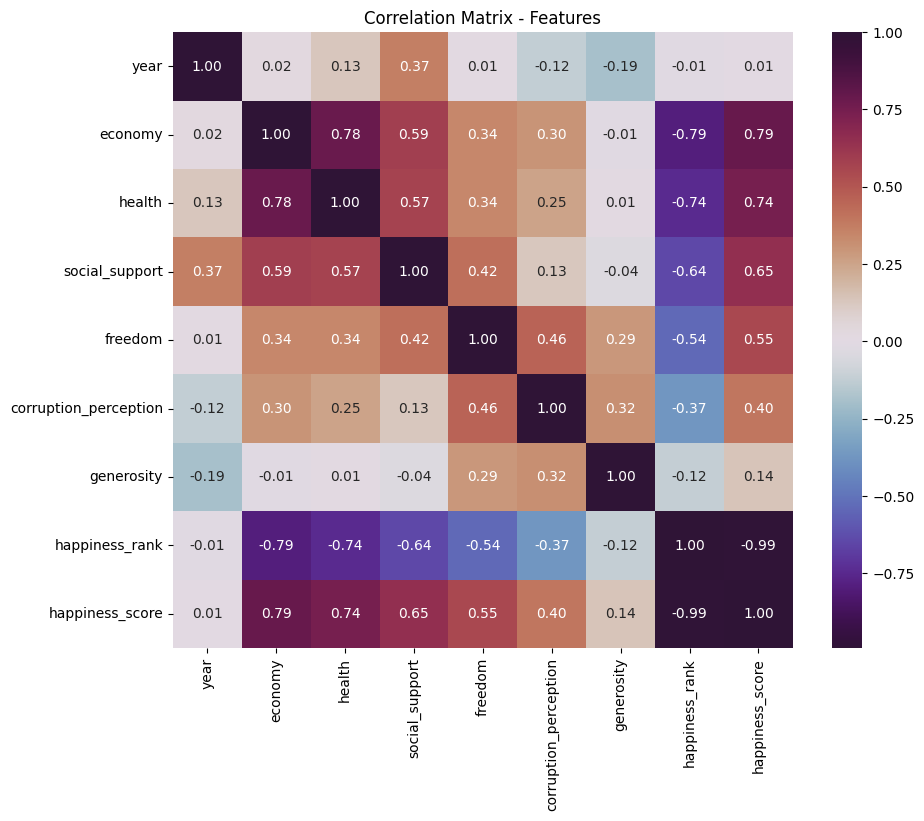

In [53]:
correlation_df = df.drop(["country", "continent"], axis=1)

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="twilight_shifted", fmt=".2f")
plt.title("Correlation Matrix - Features")
plt.show()

## **Saving the cleaned dataframe as CSV**

The final dataframe, which compiles data from all five years, is saved as a CSV file for future use. This ensures that the cleaned and processed data is readily available for further analysis or modeling without the need to repeat the data preparation steps.

In [55]:
df.to_csv("./data/world_happiness_report.csv", index=False)